# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [2]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 29.08, 即時現金賣出: 29.75


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [3]:


a=html.find_all('td',class_="currency phone-small-font")

b=[]
for i in range(len(a)):
    b.append(a[i].find_all('div',class_="visible-phone print_hide"))
country=[]
for i in range(len(b)):
    country.append(b[i][0].text.replace('\r','').replace('\n','').replace(' ',''))
print(country)

#-----------------------------
aa=[]
c=html.find_all('td',class_="rate-content-cash text-right print_hide")

rate=[]
for i in range(len(c)):
    rate.append(c[i].text)
rete1=[]
rate2=[]
rate2=rate[::2]
rate1=rate[1::2]

for i in range(len(country)):
    print(country[i]+'---'+rate1[i]+'--'+rate2[i])


['美金(USD)', '港幣(HKD)', '英鎊(GBP)', '澳幣(AUD)', '加拿大幣(CAD)', '新加坡幣(SGD)', '瑞士法郎(CHF)', '日圓(JPY)', '南非幣(ZAR)', '瑞典幣(SEK)', '紐元(NZD)', '泰幣(THB)', '菲國比索(PHP)', '印尼幣(IDR)', '歐元(EUR)', '韓元(KRW)', '越南盾(VND)', '馬來幣(MYR)', '人民幣(CNY)']
美金(USD)---29.75--29.08
港幣(HKD)---3.851--3.647
英鎊(GBP)---39.55--37.43
澳幣(AUD)---21.53--20.75
加拿大幣(CAD)---22.73--21.82
新加坡幣(SGD)---21.87--20.96
瑞士法郎(CHF)---32.78--31.58
日圓(JPY)---0.2811--0.2683
南非幣(ZAR)-------
瑞典幣(SEK)---3.5--2.98
紐元(NZD)---19.62--18.77
泰幣(THB)---0.9992--0.8092
菲國比索(PHP)---0.6671--0.5341
印尼幣(IDR)---0.00238--0.00168
歐元(EUR)---35.39--34.05
韓元(KRW)---0.02701--0.02311
越南盾(VND)---0.0014--0.0009
馬來幣(MYR)---7.587--5.962
人民幣(CNY)---4.333--4.171


## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


美金(USD)



<Figure size 720x576 with 0 Axes>

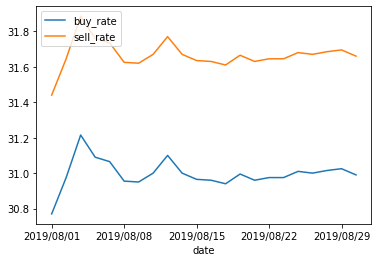

In [4]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2019-08")
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()



### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

In [6]:
history_rate_link

'https://rate.bot.com.tw/xrt/history/USD'

In [44]:
a=html.find_all('td',attrs={'class':'text-center print_hide phone-small-font','data-table':'歷史匯率'})


url=[]
for i in range(len(a)):
    url.append(a[i].a["href"])
    
url_result=[]
for i in range(len(url)):
    url_result.append('https://rate.bot.com.tw'+url[i])
url_result_date=[]
for i in range(len(url)):
    url_result_date.append(url_result[i].replace("history", "quote/2020-07"))


In [20]:
 
    
def running(x):     
    url_2 = x
    resp = requests.get(url_2)
    resp.encoding = 'utf-8'
    html = BeautifulSoup(resp.text, "lxml")

    data_sell=[]
    data=html.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    data.reverse()
    #-------------------------------------------------------------
    data_sell=data[::2]
    data_buy=data[1::2]
    #-------------------------------------------------------------
    sell=[]
    buy=[]
    for i in range(len(data_sell)):
        sell.append(data_sell[i].text)
    for i in range(len(data_buy)):
        buy.append(data_buy[i].text)
    sell_ = [float(s) for s in sell]
    buy_=[float(s) for s in buy]
    #-------------------------------------------------------------
    data_date=[]
    data__date=[]
    date=html.find_all(name='td', attrs={'class':'text-center'})
    date_1=date[0].find_all('a')
    for i in range(len(date)):
        data_date.append(date[i].find_all('a'))
    import itertools

    a=list(itertools.chain.from_iterable(data_date))
    data___date=[]
    for i in range(len(a)):
        data___date.append(a[i].text)
    #---------------------------------------------------------------
    data___date.reverse()
    #---------------------------------------------------------------
    HistoryExchangeRate = pd.DataFrame({'date': data___date,
                                        'buy_rate':buy_,
                                        'sell_rate':sell_})

    HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
    HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

    # 畫出歷史匯率軌跡圖
    plt.figure(figsize=(10, 8))
    HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
    plt.legend(loc="upper left")
    plt.show()


USD


<Figure size 720x576 with 0 Axes>

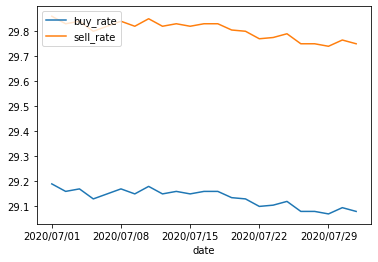

HKD


<Figure size 720x576 with 0 Axes>

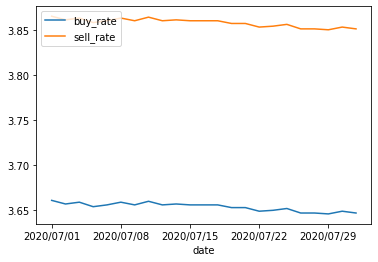

GBP


<Figure size 720x576 with 0 Axes>

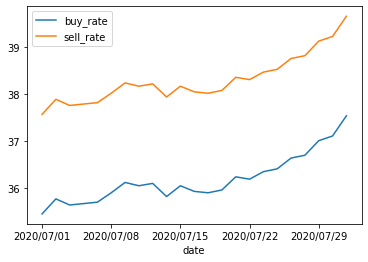

AUD


<Figure size 720x576 with 0 Axes>

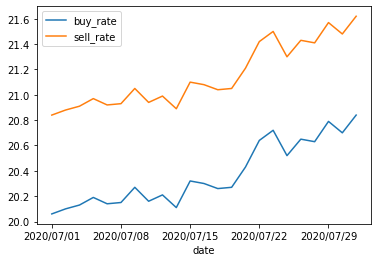

CAD


<Figure size 720x576 with 0 Axes>

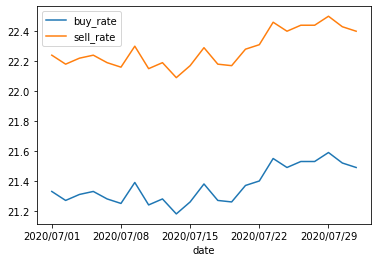

SGD


<Figure size 720x576 with 0 Axes>

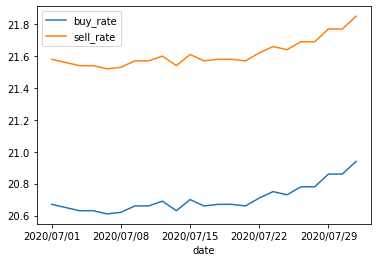

CHF


<Figure size 720x576 with 0 Axes>

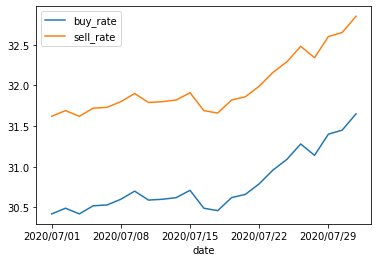

JPY


<Figure size 720x576 with 0 Axes>

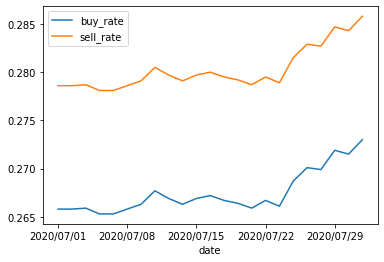

ZAR


<Figure size 720x576 with 0 Axes>

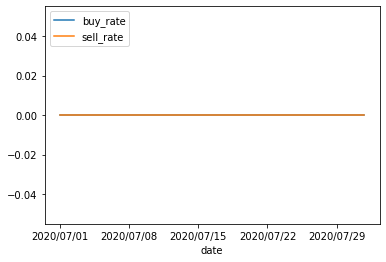

SEK


<Figure size 720x576 with 0 Axes>

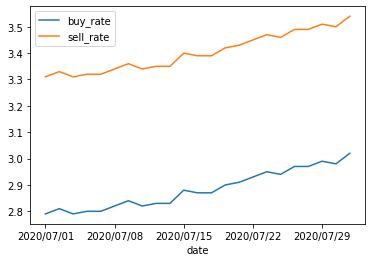

NZD


<Figure size 720x576 with 0 Axes>

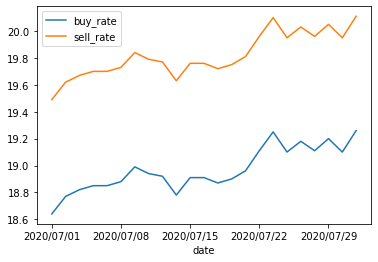

THB


<Figure size 720x576 with 0 Axes>

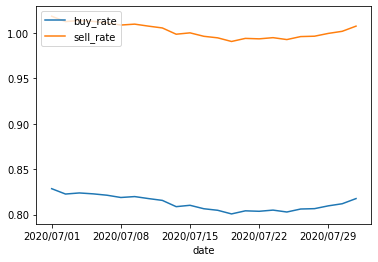

PHP


<Figure size 720x576 with 0 Axes>

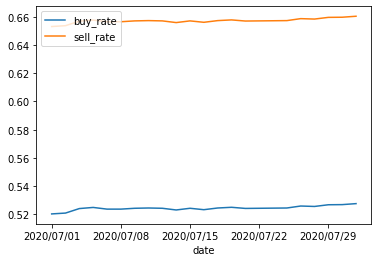

IDR


<Figure size 720x576 with 0 Axes>

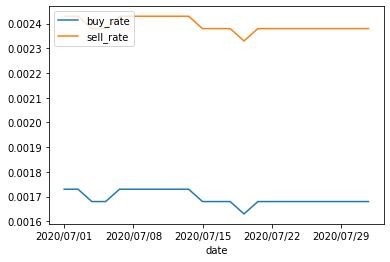

EUR


<Figure size 720x576 with 0 Axes>

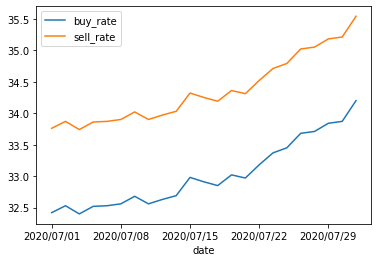

KRW


<Figure size 720x576 with 0 Axes>

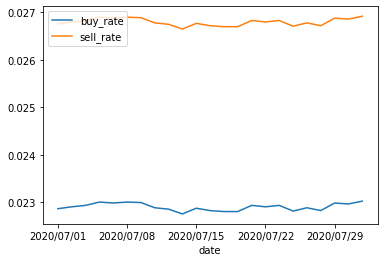

VND


<Figure size 720x576 with 0 Axes>

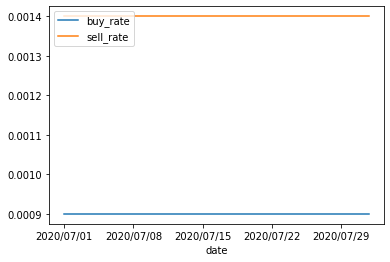

MYR


<Figure size 720x576 with 0 Axes>

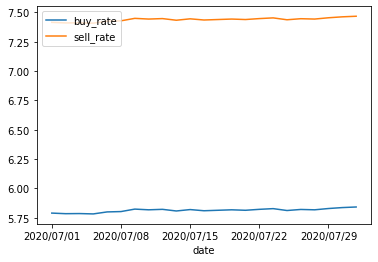

CNY


<Figure size 720x576 with 0 Axes>

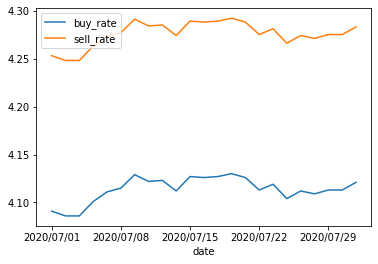

In [43]:
for i in range(len(url_result_date)):
    print(url_result_date[i][-3:])
    running(url_result_date[i])

    
  
